In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Set visual theme
sns.set(style="whitegrid")

In [3]:
# Load Dataset
file_path = "D:/Project/individual+household+electric+power+consumption/household_power_consumption.txt" 

In [4]:
# Read data with proper settings
df = pd.read_csv(
    file_path,
    sep=';',
    low_memory=False,
    na_values='?',
    parse_dates=[[0, 1]],  # Combine Date and Time
    infer_datetime_format=True
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\258207173.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\258207173.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\258207173.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


In [5]:
# Rename the datetime column
df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)

In [6]:
# Set datetime as index
df.set_index('Datetime', inplace=True)

In [7]:
# Convert power columns to numeric
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [8]:
# Drop missing values
df.dropna(inplace=True)


In [11]:
# Save cleaned version for future steps
df.to_csv("cleaned_power_data.csv")

In [9]:
# Print basic info
print("Cleaned Data Info:")
print(df.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None


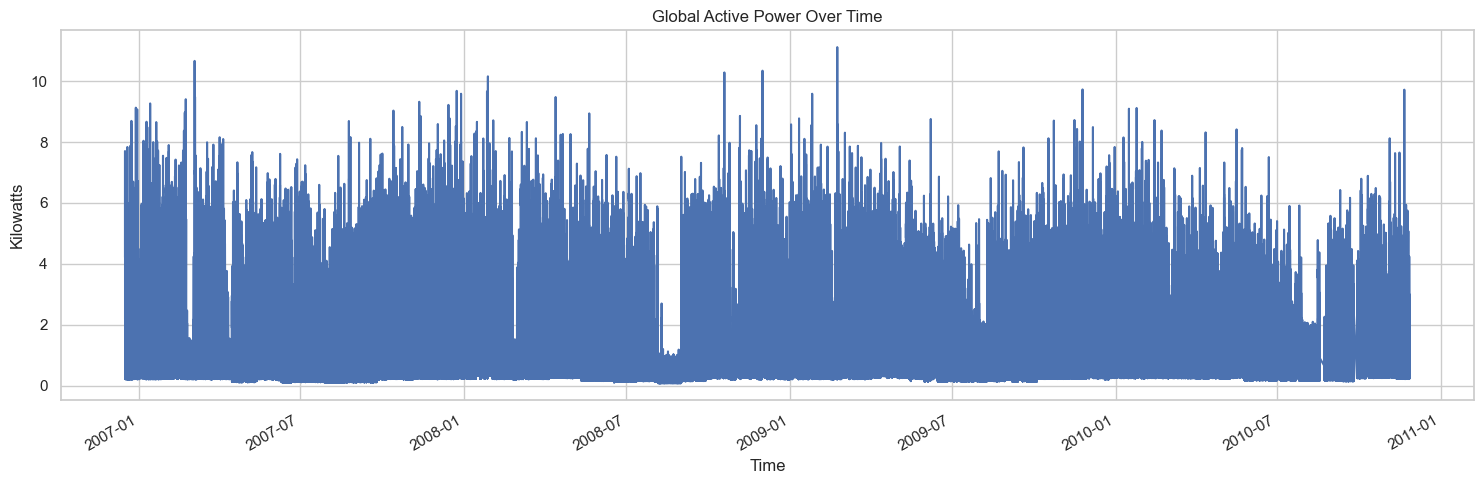

In [10]:
# Plot a sample of Global Active Power
df['Global_active_power'].plot(figsize=(15, 5), title="Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("Kilowatts")
plt.tight_layout()
plt.show()


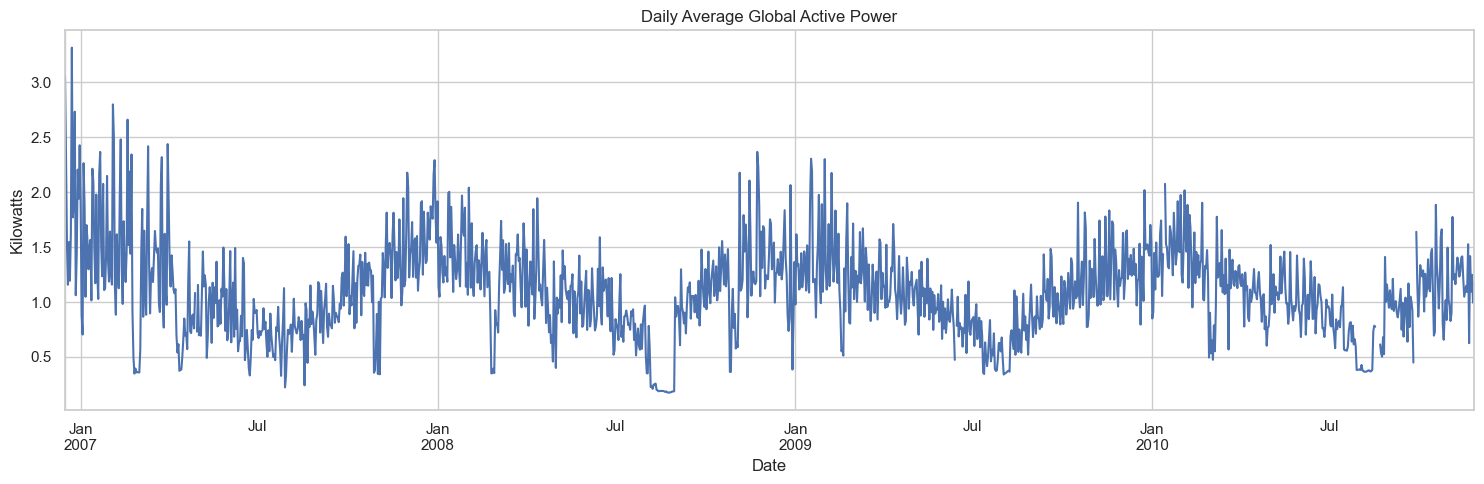

In [11]:
# Daily average usage
daily_avg = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(15, 5))
daily_avg.plot()
plt.title("Daily Average Global Active Power")
plt.xlabel("Date")
plt.ylabel("Kilowatts")
plt.tight_layout()
plt.show()

In [12]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_power_data.csv", parse_dates=['Datetime'], index_col='Datetime')

In [13]:
# Create time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [14]:
# Rolling average as a new feature
df['rolling_avg_1h'] = df['Global_active_power'].rolling(window=60).mean()
df['rolling_avg_3h'] = df['Global_active_power'].rolling(window=180).mean()


In [15]:
# Drop rows with NaN (from rolling window)
df.dropna(inplace=True)


In [16]:

# Select features and target
features = ['hour', 'day_of_week', 'month', 'is_weekend', 
            'Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'rolling_avg_1h', 'rolling_avg_3h']

X = df[features]
y = df['Global_active_power']

In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Compute RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.0251
MAE: 0.0117
R² Score: 0.9994


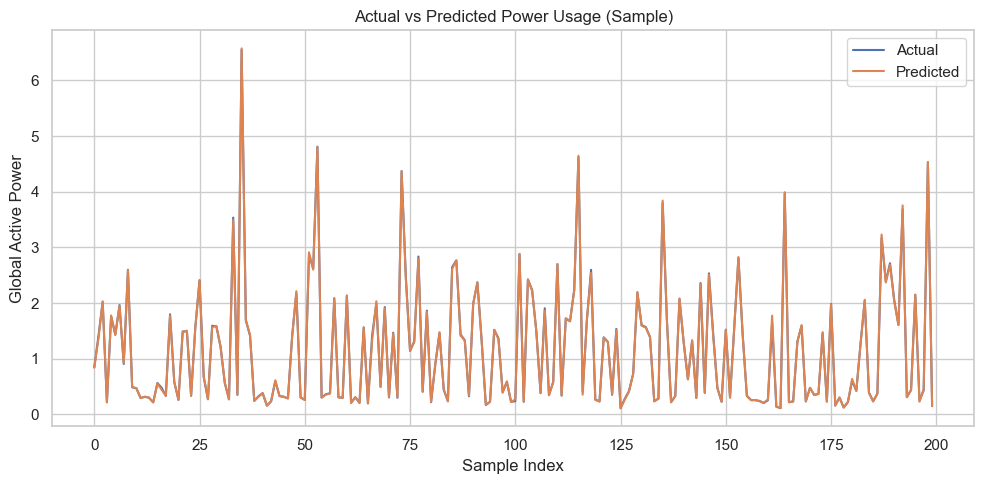

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title("Actual vs Predicted Power Usage (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.tight_layout()
plt.show()

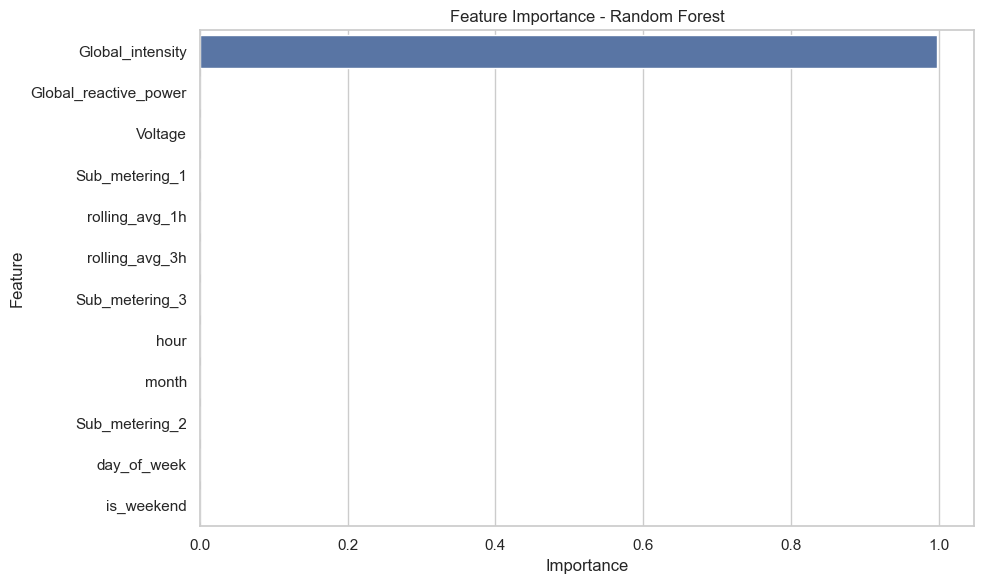

In [22]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [23]:
#LR
# Split data
X = df[features]
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# Predict
y_pred_lr = lr_model.predict(X_test)


In [26]:
# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [27]:
# Print metrics
print("Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"R²  : {r2_lr:.4f}")

Linear Regression Performance:
RMSE: 0.0404
MAE : 0.0257
R²  : 0.9985


C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\3780748866.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


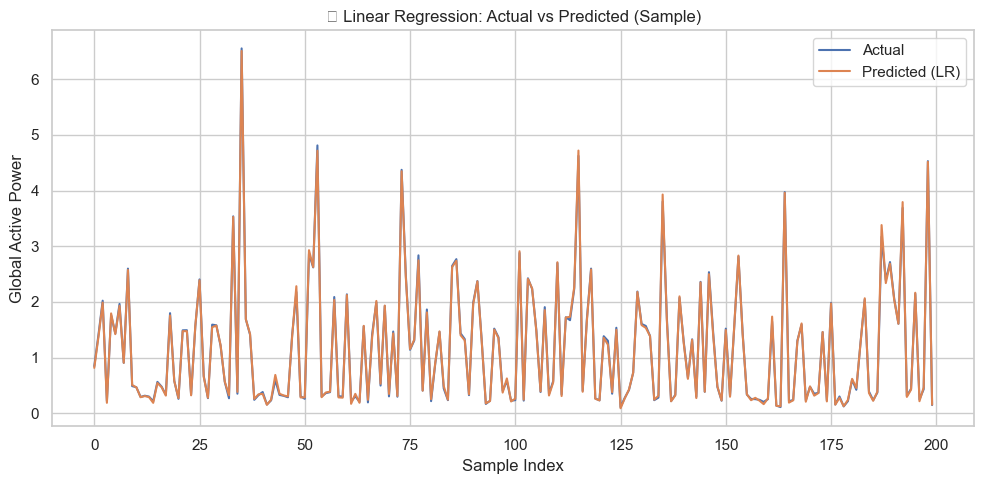

In [49]:
# Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_lr[:200], label='Predicted (LR)')
plt.title("🔍 Linear Regression: Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Train-Test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [30]:
# Predict
y_pred_gb = gb_model.predict(X_test)


In [31]:
# Evaluate
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)


In [32]:
# performance
print("Gradient Boosting Regressor Performance:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE : {mae_gb:.4f}")
print(f"R²  : {r2_gb:.4f}")

Gradient Boosting Regressor Performance:
RMSE: 0.0337
MAE : 0.0208
R²  : 0.9990


C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\1170223628.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


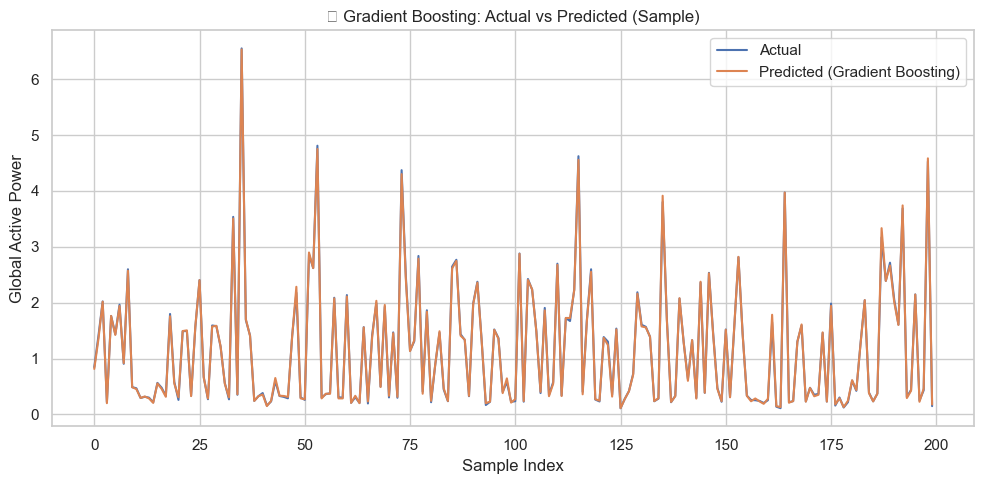

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_gb[:200], label='Predicted (Gradient Boosting)')
plt.title("📈 Gradient Boosting: Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Decision Tree
# Split data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize and train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [35]:
# Predict
y_pred_dt = dt_model.predict(X_test)

In [36]:
# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [37]:
# Print results
print("Decision Tree Regressor Performance:")
print(f"RMSE: {rmse_dt:.4f}")
print(f"MAE : {mae_dt:.4f}")
print(f"R²  : {r2_dt:.4f}")

Decision Tree Regressor Performance:
RMSE: 0.0351
MAE : 0.0151
R²  : 0.9989


C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\997615721.py:8: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


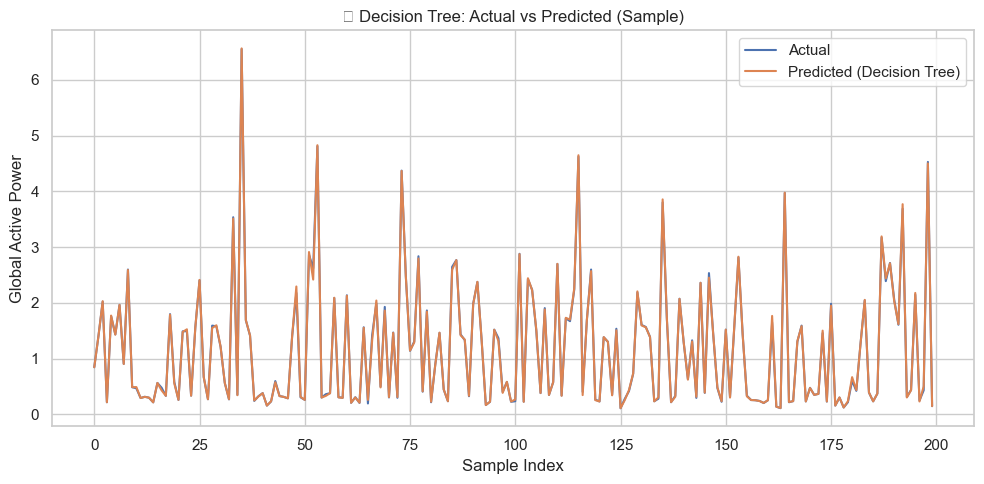

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_dt[:200], label='Predicted (Decision Tree)')
plt.title("🌳 Decision Tree: Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# KNN
# Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale data (KNN is distance-based, needs scaling!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

In [42]:
# Evaluate
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [43]:
# Output results
print("KNN Regressor Performance:")
print(f"RMSE: {rmse_knn:.4f}")
print(f"MAE : {mae_knn:.4f}")
print(f"R²  : {r2_knn:.4f}")

KNN Regressor Performance:
RMSE: 0.0786
MAE : 0.0370
R²  : 0.9945


In [44]:
# Use scaled features (neural networks also benefit from scaling)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True


In [45]:
# Predict
y_pred_mlp = mlp_model.predict(X_test_scaled)


In [46]:
# Evaluate
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

In [47]:
# Output results
print("Neural Network Regressor Performance:")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"MAE : {mae_mlp:.4f}")
print(f"R²  : {r2_mlp:.4f}")

Neural Network Regressor Performance:
RMSE: 0.0284
MAE : 0.0177
R²  : 0.9993


In [48]:
print("\nFull Model Comparison Summary:")
print(f"Linear Regression ➤ RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest     ➤ RMSE: {rmse:.4f}, R²: {r2:.4f}")
print(f"Gradient Boosting ➤ RMSE: {rmse_gb:.4f}, R²: {r2_gb:.4f}")
print(f"Decision Tree     ➤ RMSE: {rmse_dt:.4f}, R²: {r2_dt:.4f}")
print(f"KNN Regressor     ➤ RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")
print(f"Neural Network    ➤ RMSE: {rmse_mlp:.4f}, R²: {r2_mlp:.4f}")



Full Model Comparison Summary:
Linear Regression ➤ RMSE: 0.0404, R²: 0.9985
Random Forest     ➤ RMSE: 0.0251, R²: 0.9994
Gradient Boosting ➤ RMSE: 0.0337, R²: 0.9990
Decision Tree     ➤ RMSE: 0.0351, R²: 0.9989
KNN Regressor     ➤ RMSE: 0.0786, R²: 0.9945
Neural Network    ➤ RMSE: 0.0284, R²: 0.9993


In [52]:
# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting',
          'Decision Tree', 'KNN Regressor', 'Neural Network']

# Corresponding metrics
rmse_values = [rmse_lr, rmse, rmse_gb, rmse_dt, rmse_knn, rmse_mlp]
r2_values = [r2_lr, r2, r2_gb, r2_dt, r2_knn, r2_mlp]

# Create DataFrame
df_metrics = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'R2 Score': r2_values
})


C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\2497018059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df_metrics, palette='coolwarm')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\2497018059.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


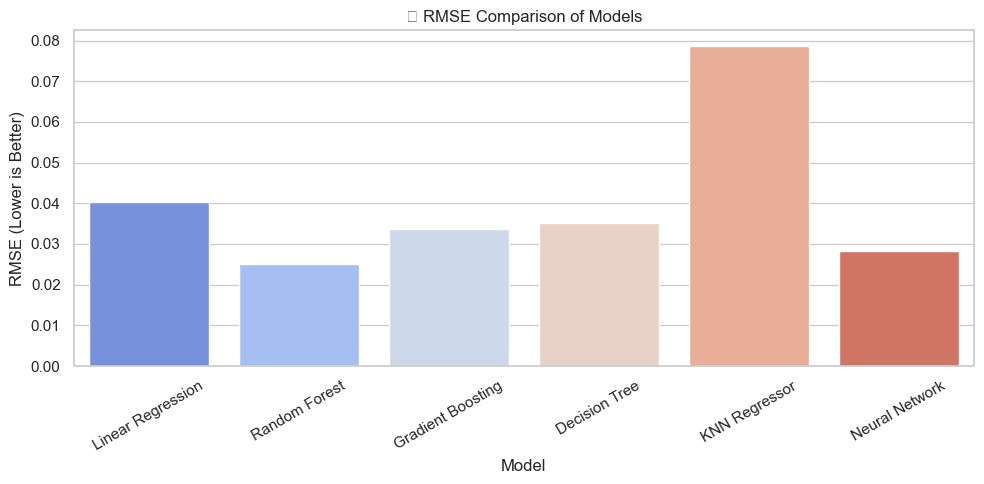

In [53]:
# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=df_metrics, palette='coolwarm')
plt.title('📉 RMSE Comparison of Models')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\16279747.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Model', y='R2 Score', data=df_metrics, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\16279747.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


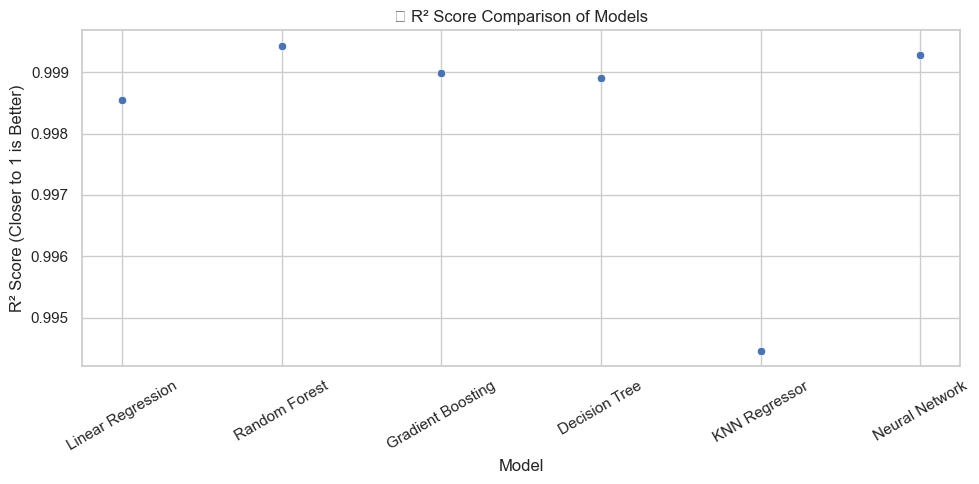

In [55]:
# Plot R2 Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Model', y='R2 Score', data=df_metrics, palette='viridis')
plt.title('📈 R² Score Comparison of Models')
plt.ylabel('R² Score (Closer to 1 is Better)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()